<a href="https://colab.research.google.com/github/Ayman161803/ISTE_ML/blob/main/ILogisticRegressionFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [65]:
df=pd.read_csv("drive/MyDrive/Titanic_ISTE.csv")

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     889 non-null    float64
 2   Pclass       890 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        890 non-null    float64
 7   Parch        889 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  0 non-null      float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  1 non-null      float64
dtypes: float64(12), int64(1), object(5)
memory usage: 

In [67]:
df.drop(columns=df.iloc[:,-6:].columns, axis=1,inplace=True)

In [68]:
df.dropna(subset=['Survived'],inplace=True)

In [69]:
df.drop(columns="Cabin",axis=1,inplace=True)

In [70]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S


In [71]:
df["SurName"]=pd.DataFrame(list(df["Name"].str.split(", "))).iloc[:,0]

In [72]:
df=df.drop(columns=["Name","Ticket","PassengerId"])

In [73]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
df=df[df["Sex"].notna()]
df["Sex"]=enc.fit_transform(df[['Sex']])
df=df[df["Embarked"].notna()]
df["Embarked"]=enc.fit_transform(df[['Embarked']])

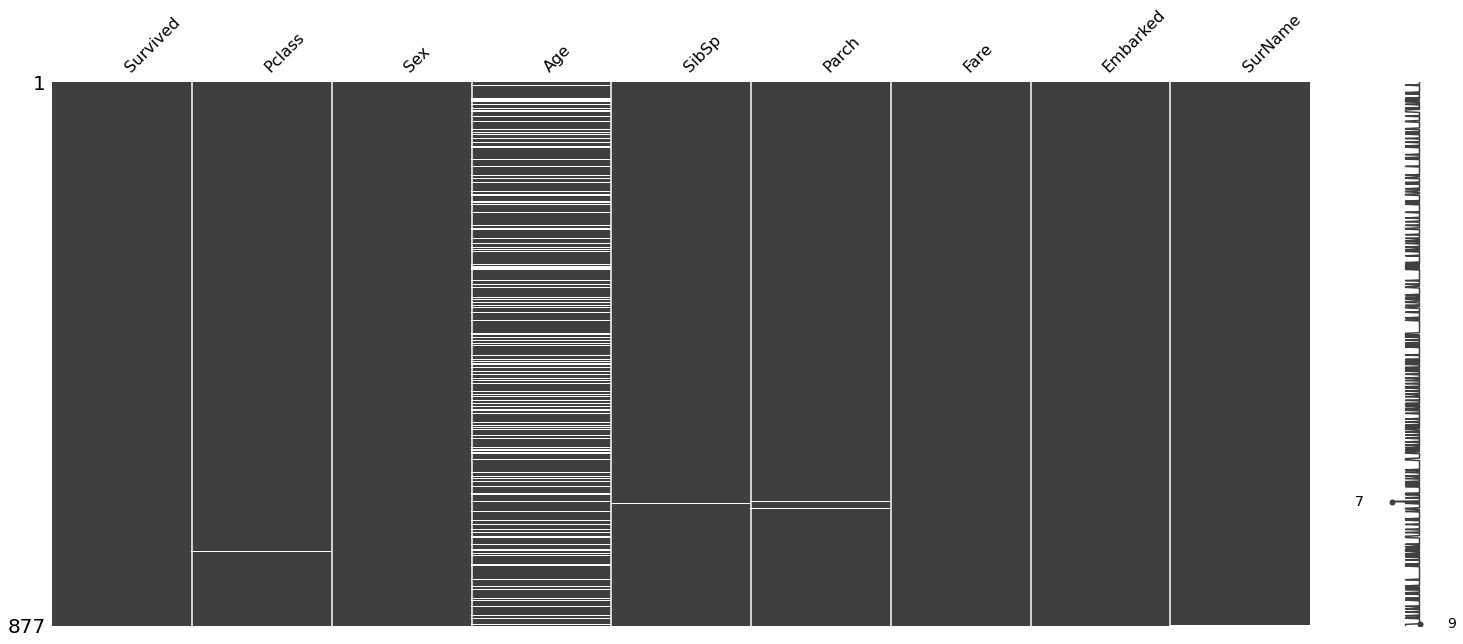

In [74]:
import missingno as missing
import seaborn as sns
missing.matrix(df)

In [75]:
df=df.drop(columns=["Age","SurName"])
df.dropna()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,1.0,0.0,7.2500,2.0
1,1.0,1.0,0.0,1.0,0.0,71.2833,0.0
2,1.0,3.0,0.0,0.0,0.0,7.9250,2.0
3,1.0,1.0,0.0,1.0,0.0,53.1000,2.0
4,0.0,3.0,1.0,0.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,0.0,0.0,13.0000,2.0
887,1.0,1.0,0.0,0.0,0.0,30.0000,2.0
888,0.0,3.0,0.0,1.0,2.0,23.4500,2.0
889,1.0,1.0,1.0,0.0,0.0,30.0000,0.0


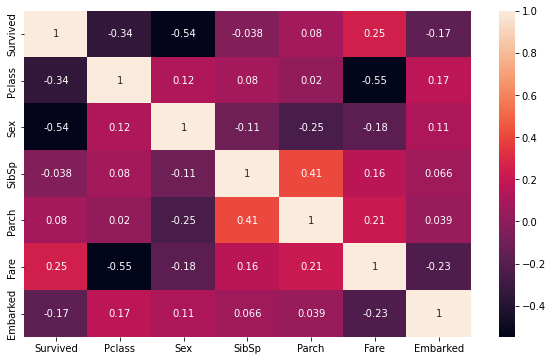

In [76]:
corr = df.corr()
plt.figure(figsize = (10, 6))

sns.heatmap(corr.iloc[:,:], annot= True)

In [145]:
def maximum_absolute_scaling(df):
    # copy the dataframe
    df_scaled = df.copy()
    # apply maximum absolute scaling
    for column in df_scaled.columns:
        df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
    return df_scaled

In [287]:

def hypothesis(X, theta):
    z = np.dot(theta, X.T)
    return 1/(1+np.exp(-(z)))-0.0000000001

def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

def gradient_descent(X, y, theta, alpha, epochs):
    m =X.shape[0]
    costList = [cost(X, y, theta)] 
    for i in range(0, epochs):
        h = hypothesis(X, theta)
        for i in range(0, len(X.columns)):
            theta[i] -= (alpha/m) * np.sum((h-y)*X.iloc[:, i])
        costList.append(cost(X, y, theta))
    return costList, theta

def predict(X, y, theta, alpha, epochs):
    J, th = gradient_descent(X, y, theta, alpha, epochs) 
    h = hypothesis(X, theta)
    for i in range(len(h)):
        h[i]=1 if h[i]>=0.5 else 0
    y = list(y)
    accuracy = np.sum([y[i] == h[i] for i in range(len(y))])/len(y)
    return J,h,th,accuracy
new=maximum_absolute_scaling(df)
X=new.iloc[:,1:]
y=new.iloc[:,-1]
initial_thetas=[0.5]*len(X.columns)
Cost, predictions, final_Theta_values , accuracy= predict(X, y, initial_thetas, 1, 1000)